In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%load_ext pycodestyle_magic
%flake8_on

# I. Analyse des données en lien avec des clients

In [4]:
# Importation
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
# Visualiser l'information (type, nombre de colonne et de ligne, ...)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
df_customers.customer_id.nunique()

99441

In [7]:
df_customers.customer_unique_id.nunique()

96096

In [8]:
# Importation
df_geo = pd.read_csv('olist_geolocation_dataset.csv')
df_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [9]:
# Visualiser l'information (type, nombre de colonne et de ligne, ...)
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [10]:
# combiner les informations des clients

df_customers = pd.merge(df_geo, df_customers,
                        right_on=["customer_zip_code_prefix", "customer_city",
                                  "customer_state"],
                        left_on=["geolocation_zip_code_prefix",
                                 "geolocation_city",
                                 "geolocation_state"],
                        how="right")

df_customers.drop(["geolocation_zip_code_prefix",
                   "geolocation_city", "geolocation_state"],
                  axis=1, inplace=True)

df_customers = df_customers[['customer_id',
                             "customer_unique_id",
                             "customer_zip_code_prefix",
                             "customer_city", "customer_state",
                             "geolocation_lat", "geolocation_lng"]]

df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194
...,...,...,...,...,...,...,...
14129676,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.599369,-46.905603
14129677,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.593577,-46.910112
14129678,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.584425,-46.892014
14129679,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.595022,-46.918546


In [11]:
# Affichage du pourcentage de donneés manquantes
df_customers.isna().sum()/df_customers.shape[0]

customer_id                 0.000000
customer_unique_id          0.000000
customer_zip_code_prefix    0.000000
customer_city               0.000000
customer_state              0.000000
geolocation_lat             0.000023
geolocation_lng             0.000023
dtype: float64

In [12]:
df_customers['customer_unique_id'].duplicated().sum()

14033585

In [13]:
df_customers.drop_duplicates(subset=['customer_unique_id'], inplace=True)

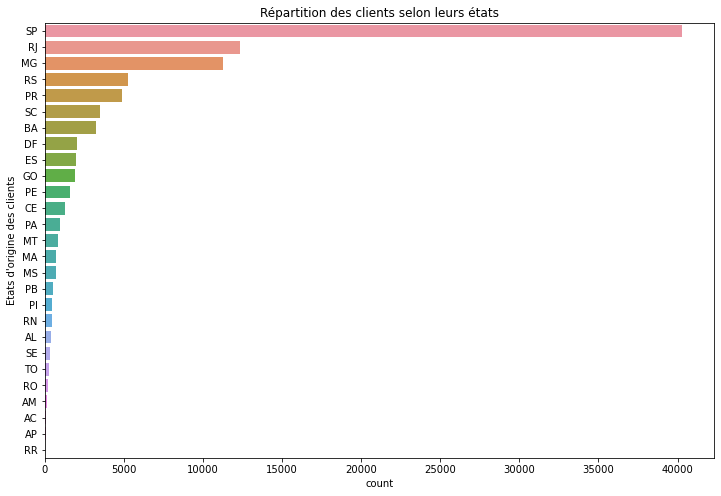

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(y="customer_state",
              data=df_customers,
              order=df_customers["customer_state"].value_counts().index)
plt.title("Répartition des clients selon leurs états")
plt.ylabel("Etats d'origine des clients")
plt.show()

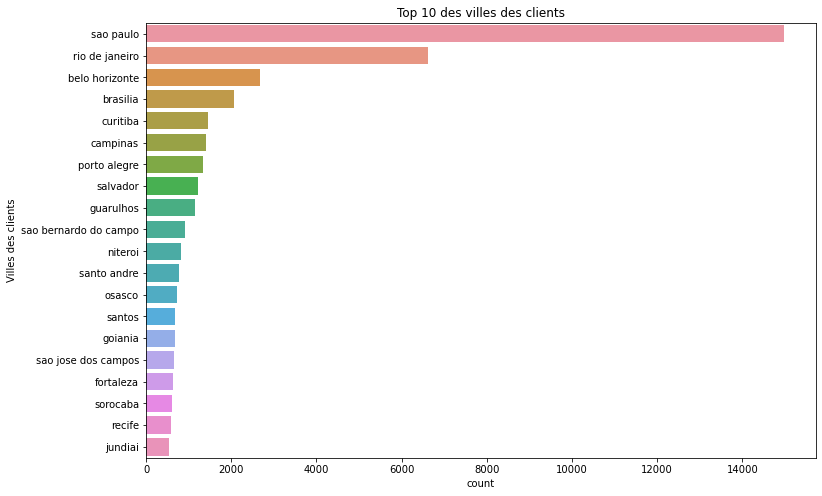

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(y="customer_city",
              data=df_customers,
              order=df_customers["customer_city"].value_counts().index[:20])
plt.title("Top 10 des villes des clients")
plt.ylabel("Villes des clients")
plt.show()

# II. Analyse des achats

In [28]:
# Importation
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_orders_payments = pd.read_csv("olist_order_payments_dataset.csv")
df_review = pd.read_csv("olist_order_reviews_dataset.csv")
df_order_items = pd.read_csv("olist_order_items_dataset.csv")

In [29]:
# combiner des données
df_orders = pd.merge(df_orders, df_orders_payments, on="order_id", how="left")
df_orders = pd.merge(df_orders, df_review, on="order_id", how="left")
df_orders = pd.merge(df_orders, df_order_items, on="order_id", how="left")
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,credit_card,...,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,credit_card,...,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,...,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,...,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [30]:
# Affichage du pourcentage de donneés manquantes
df_orders.isna().sum()/df_orders.shape[0]

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001486
order_delivered_carrier_date     0.017508
order_delivered_customer_date    0.028713
order_estimated_delivery_date    0.000000
payment_sequential               0.000025
payment_type                     0.000025
payment_installments             0.000025
payment_value                    0.000025
review_id                        0.008368
review_score                     0.008368
review_comment_title             0.882586
review_comment_message           0.578280
review_creation_date             0.008368
review_answer_timestamp          0.008368
order_item_id                    0.006992
product_id                       0.006992
seller_id                        0.006992
shipping_limit_date              0.006992
price                            0.006992
freight_value                    0

In [31]:
# nombre d'achat dupliqué
df_orders['order_id'].duplicated().sum()

19702

In [32]:
# Supprimer les achats dupliqué
df_orders.drop_duplicates(subset="order_id", keep="last", inplace=True)

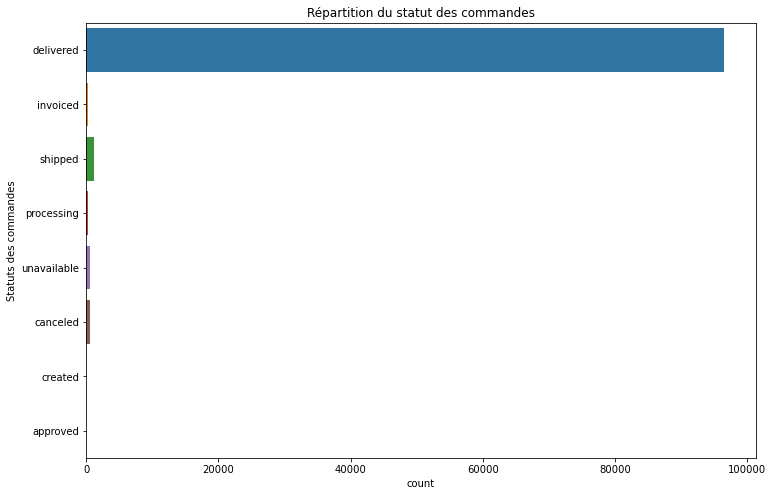

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(y="order_status", data=df_orders)
plt.title("Répartition du statut des commandes")
plt.ylabel("Statuts des commandes")
plt.show()

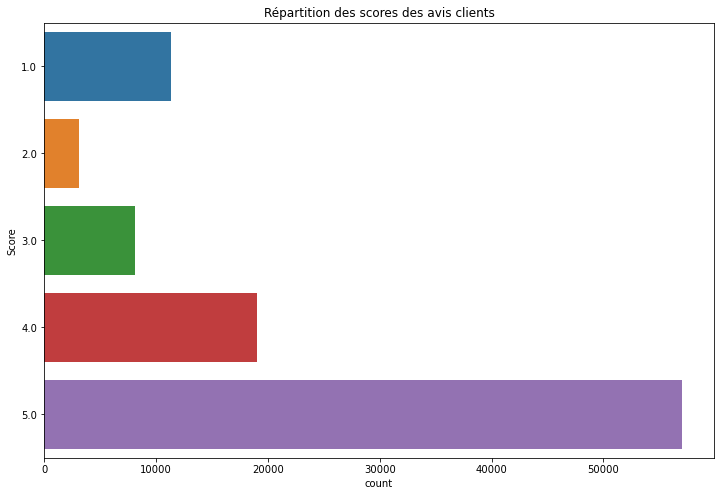

In [34]:
plt.figure(figsize=(12, 8))
sns.countplot(y="review_score", data=df_orders)
plt.title("Répartition des scores des avis clients")
plt.ylabel("Score")
plt.show()

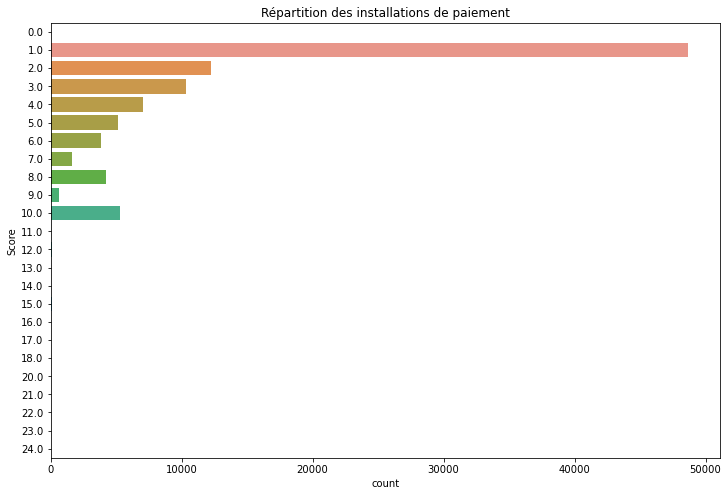

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(y="payment_installments", data=df_orders)
plt.title("Répartition des installations de paiement")
plt.ylabel("Score")
plt.show()

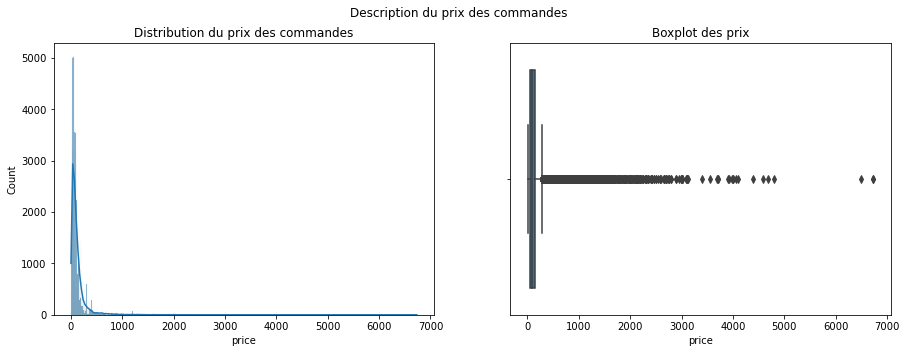

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description du prix des commandes')

sns.histplot(ax=axes[0], x="price", data=df_orders, kde=True)
axes[0].set_title("Distribution du prix des commandes")

sns.boxplot(ax=axes[1], x="price", data=df_orders)
axes[1].set_title("Boxplot des prix")

plt.show()

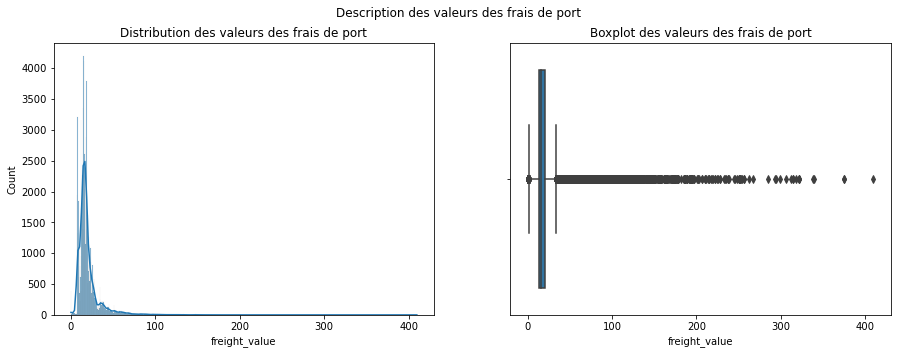

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des valeurs des frais de port')

sns.histplot(ax=axes[0], x="freight_value", data=df_orders, kde=True)
axes[0].set_title("Distribution des valeurs des frais de port")

sns.boxplot(ax=axes[1], x="freight_value", data=df_orders)
axes[1].set_title("Boxplot des valeurs des frais de port")

plt.show()

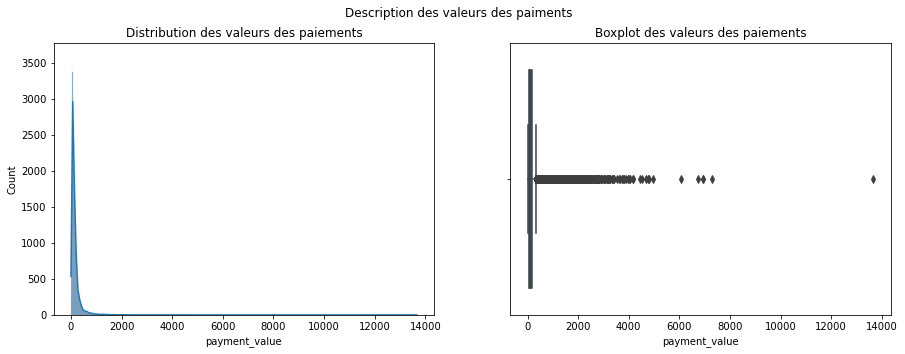

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des valeurs des paiments')

sns.histplot(ax=axes[0], x="payment_value", data=df_orders, kde=True)
axes[0].set_title("Distribution des valeurs des paiements")

sns.boxplot(ax=axes[1], x="payment_value", data=df_orders)
axes[1].set_title("Boxplot des valeurs des paiements")

plt.show()

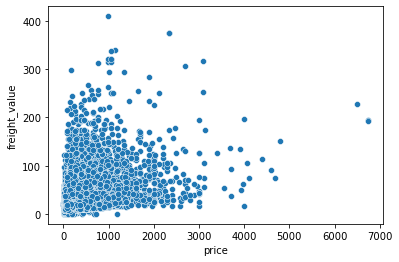

In [41]:
sns.scatterplot(x="price", y="freight_value", data=df_orders)
plt.show()

# III. Analyses des produits

In [45]:
# Importation
df_products = pd.read_csv("olist_products_dataset.csv")
df_translation = pd.read_csv('product_category_name_translation.csv')

# combiner des données
df_products = pd.merge(df_products, df_translation, on="product_category_name")
df_products.drop("product_category_name", axis=1, inplace=True)
df_products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [46]:
# Affichage du pourcentage de donneés manquantes
df_products.isna().sum()/df_products.shape[0]

product_id                       0.000000
product_name_lenght              0.000000
product_description_lenght       0.000000
product_photos_qty               0.000000
product_weight_g                 0.000031
product_length_cm                0.000031
product_height_cm                0.000031
product_width_cm                 0.000031
product_category_name_english    0.000000
dtype: float64

In [47]:
# produit dupliqué
df_products[df_products.duplicated()]

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english


In [48]:
df_products["product_category_name_english"].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

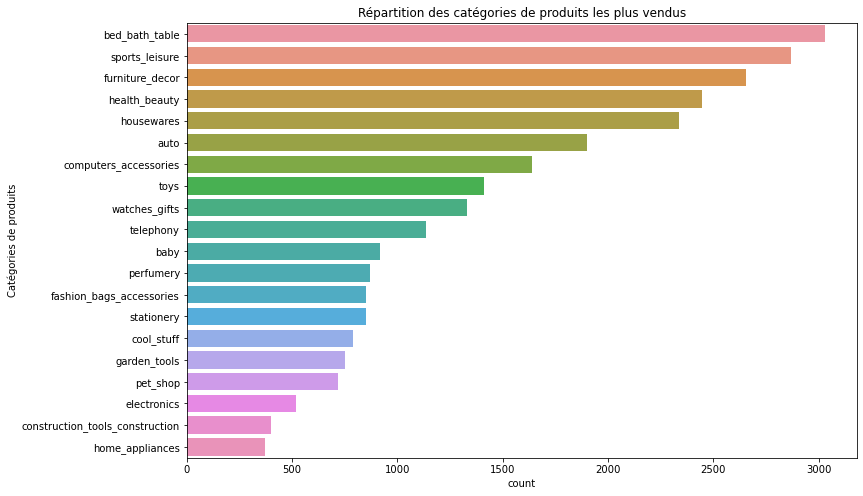

In [88]:

plt.figure(figsize=(12, 8))
sns.countplot(y="product_category_name_english",
              data=df_products,
              order=df_products["product_category_name_english"].
              value_counts().index[:20])
plt.ylabel("Catégories de produits")
plt.title("Répartition des catégories de produits les plus vendus")
plt.show()

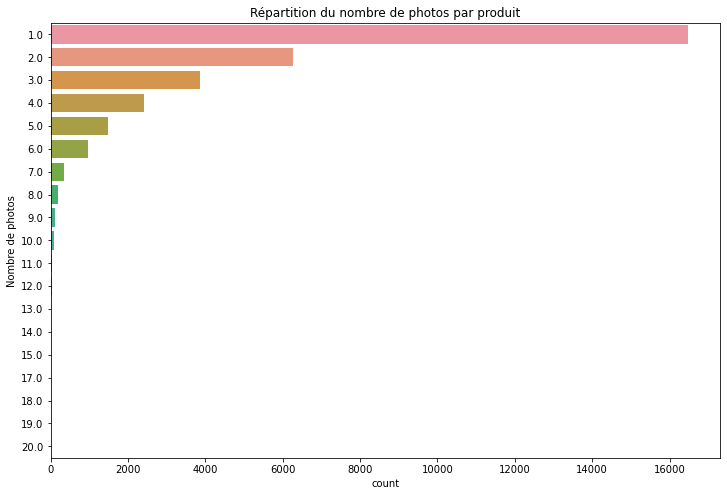

In [60]:
plt.figure(figsize=(12, 8))
sns.countplot(y="product_photos_qty", data=df_products)
plt.ylabel("Nombre de photos")
plt.title("Répartition du nombre de photos par produit")
plt.show()

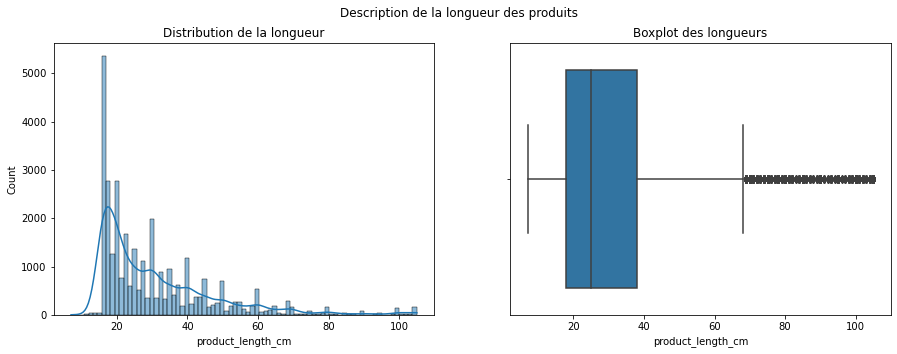

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la longueur des produits')

sns.histplot(ax=axes[0], x="product_length_cm", data=df_products, kde=True)
axes[0].set_title("Distribution de la longueur")

sns.boxplot(ax=axes[1], x="product_length_cm", data=df_products)
axes[1].set_title("Boxplot des longueurs")

plt.show()

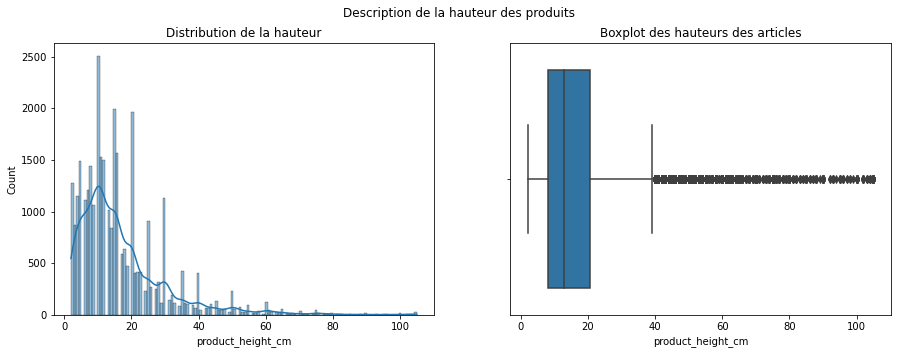

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la hauteur des produits')

sns.histplot(ax=axes[0], x="product_height_cm", data=df_products, kde=True)
axes[0].set_title("Distribution de la hauteur")

sns.boxplot(ax=axes[1], x="product_height_cm", data=df_products)
axes[1].set_title("Boxplot des hauteurs des articles")

plt.show()

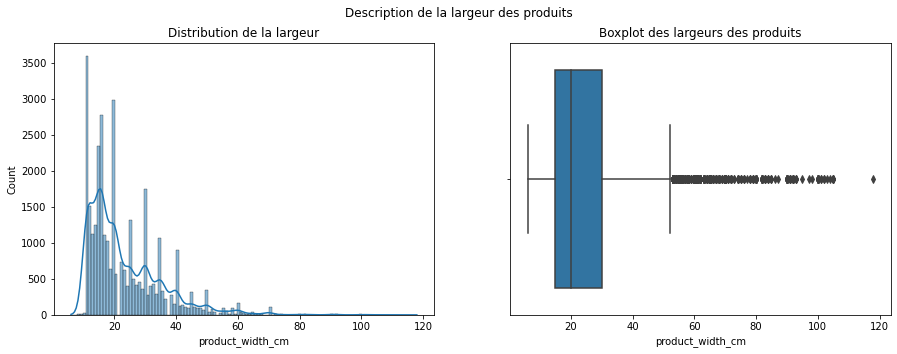

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la largeur des produits')

sns.histplot(ax=axes[0], x="product_width_cm", data=df_products, kde=True)
axes[0].set_title("Distribution de la largeur")

sns.boxplot(ax=axes[1], x="product_width_cm", data=df_products)
axes[1].set_title("Boxplot des largeurs des produits")

plt.show()

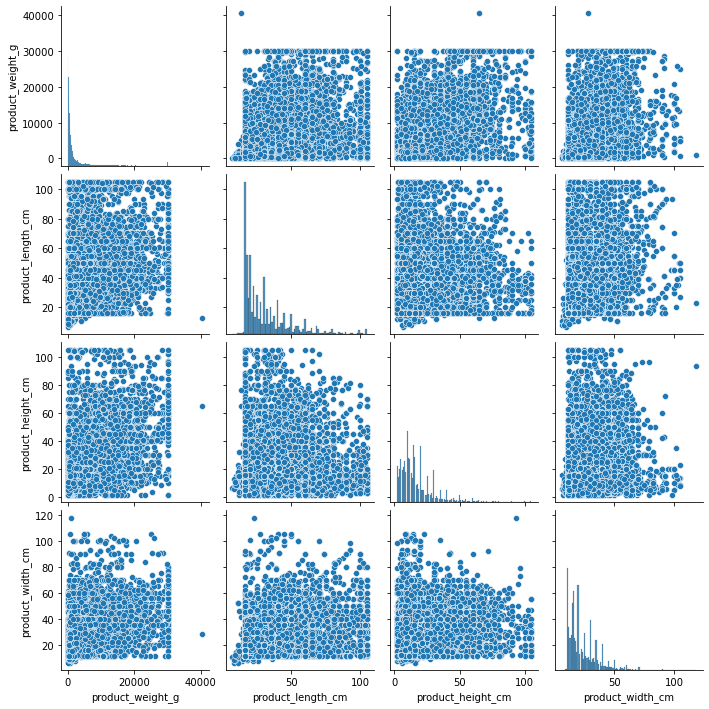

In [66]:
sns.pairplot(df_products[['product_weight_g', 'product_length_cm',
                          'product_height_cm', 'product_width_cm']])
plt.show()

# IV. Analyse des vendeurs

In [69]:
# Importation
df_sellers = pd.read_csv("olist_sellers_dataset.csv")

# combiner des données
df_sellers = pd.merge(df_geo, df_sellers,
                      right_on=["seller_zip_code_prefix",
                                "seller_city", "seller_state"],
                      left_on=["geolocation_zip_code_prefix",
                               "geolocation_city",
                               "geolocation_state"], how="right")
df_sellers.drop(["geolocation_zip_code_prefix",
                 "geolocation_city",
                 "geolocation_state"], axis=1, inplace=True)
df_sellers = df_sellers[['seller_id',
                         "seller_zip_code_prefix",
                         "seller_city",
                         "seller_state",
                         "geolocation_lat",
                         "geolocation_lng"]]
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431
...,...,...,...,...,...,...
385716,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.014367,-45.585565
385717,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011805,-45.580629
385718,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011130,-45.592347
385719,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009155,-45.592019


In [70]:
df_sellers.isna().sum()/df_sellers.shape[0]

seller_id                 0.000000
seller_zip_code_prefix    0.000000
seller_city               0.000000
seller_state              0.000000
geolocation_lat           0.000355
geolocation_lng           0.000355
dtype: float64

In [71]:
df_sellers['seller_id'].duplicated().sum()

382626

In [72]:
df_sellers.drop_duplicates(subset="seller_id", inplace=True)

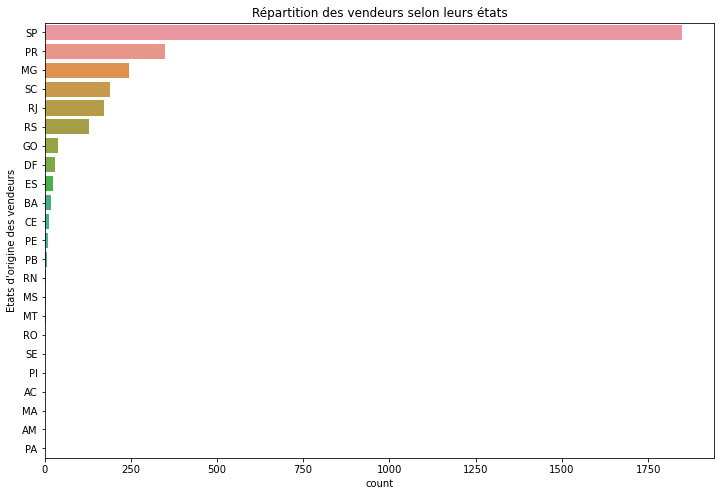

In [74]:
plt.figure(figsize=(12, 8))
sns.countplot(y="seller_state",
              data=df_sellers,
              order=df_sellers["seller_state"].value_counts().index)
plt.title("Répartition des vendeurs selon leurs états")
plt.ylabel("Etats d'origine des vendeurs")
plt.show()

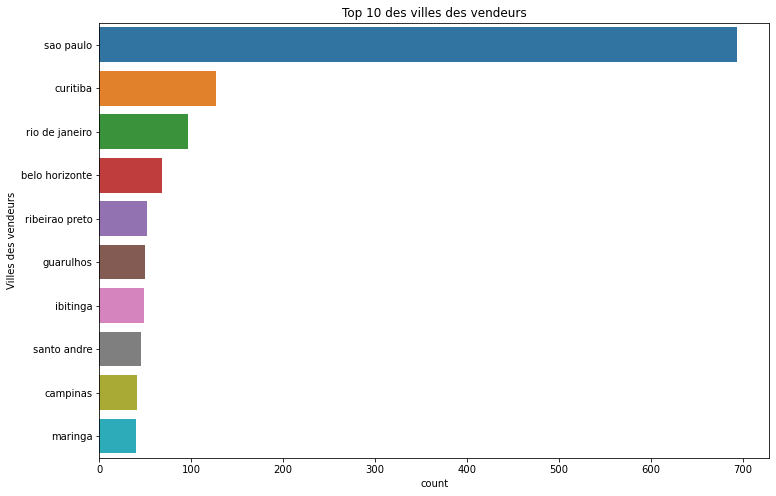

In [76]:
plt.figure(figsize=(12, 8))
sns.countplot(y="seller_city",
              data=df_sellers,
              order=df_sellers["seller_city"].value_counts().index[:10])
plt.title("Top 10 des villes des vendeurs")
plt.ylabel("Villes des vendeurs")
plt.show()

# V. Analyses des produits et des ventes

In [77]:
# combiner des données
df_prod_orders = pd.merge(df_products, df_orders, on="product_id", how="left")
df_prod_orders

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,...,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,5fa78e91b5cb84b6a8ccc42733f95742,...,2.0,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,1.0,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78
2,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,048cc42e03ca8d43c729adf6962cb348,...,5.0,NaN,O produto que chegou é mais bonito do que eu e...,2017-11-24 00:00:00,2017-11-24 18:34:45,1.0,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78
3,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,a84a0bd528e053f6b266e21bb1111e3f,...,5.0,Muito bom !!,Recomendo tanto o site lannister quanto a loja...,2018-07-11 00:00:00,2018-07-11 10:06:10,1.0,620c87c171fb2a6dd6e8bb4dec959fc6,2018-07-09 20:31:35,319.90,15.45
4,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,5.0,NaN,ótimo produto e ótima loja para comprar pelo s...,2017-08-09 00:00:00,2017-08-09 19:30:09,1.0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98284,1dceebcc5f23c02ea23e16d5bedca000,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,742a36775534b588ed2a62ba4c2d9cd7,...,4.0,NaN,"Ótimo, entregaram na datacert",2017-08-13 00:00:00,2017-08-13 20:06:09,1.0,4e922959ae960d389249c378d1c939f5,2017-08-08 02:23:30,45.00,9.94
98285,1dceebcc5f23c02ea23e16d5bedca000,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,d4e8d3bb5e3673ed68ac154fe86de946,...,5.0,NaN,NaN,2017-11-04 00:00:00,2017-11-06 14:54:54,1.0,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11
98286,1dceebcc5f23c02ea23e16d5bedca000,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,9c782cb7854e5dfa91927cfca8949eb8,...,5.0,NaN,NaN,2017-07-19 00:00:00,2017-07-21 23:28:33,1.0,4e922959ae960d389249c378d1c939f5,2017-07-19 11:35:22,45.00,16.11
98287,1dceebcc5f23c02ea23e16d5bedca000,47.0,117.0,2.0,550.0,35.0,15.0,25.0,cds_dvds_musicals,615ca9b2afeaf5644ae8cef64797132e,...,5.0,NaN,NaN,2017-08-15 00:00:00,2017-08-16 14:20:31,2.0,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11


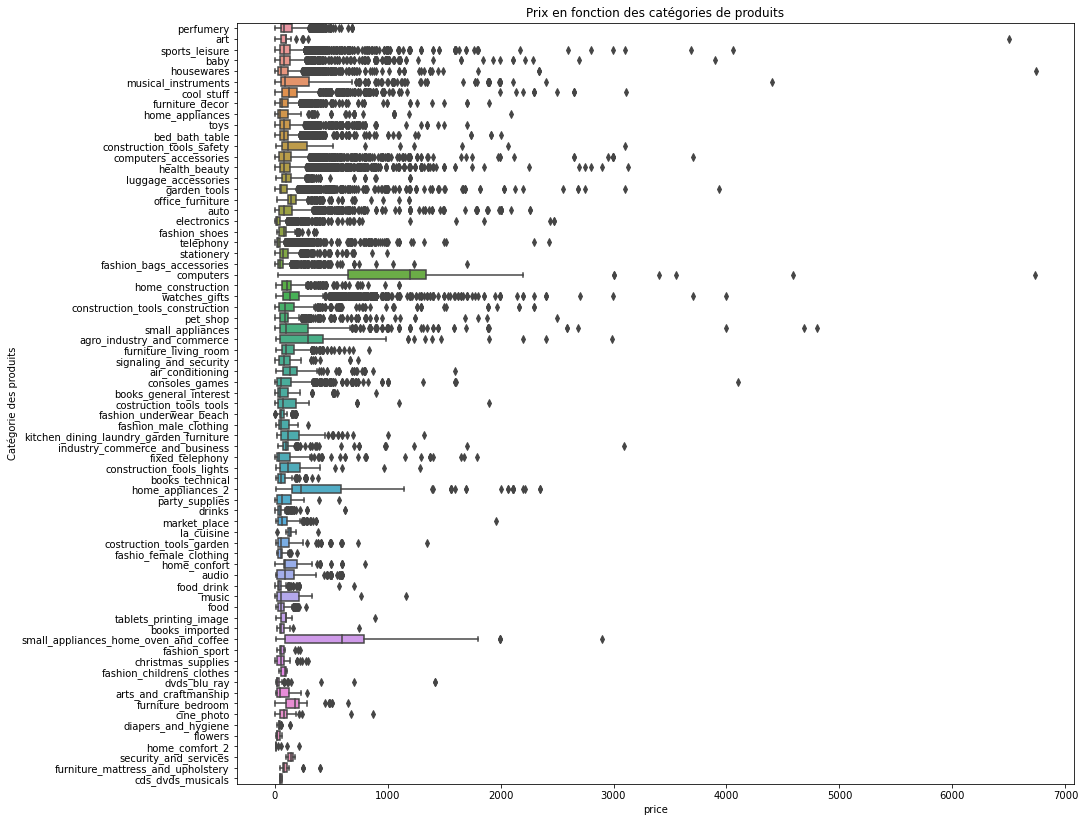

In [78]:
plt.figure(figsize=(15, 14))
sns.boxplot(x="price", y="product_category_name_english", data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Prix en fonction des catégories de produits")
plt.show()

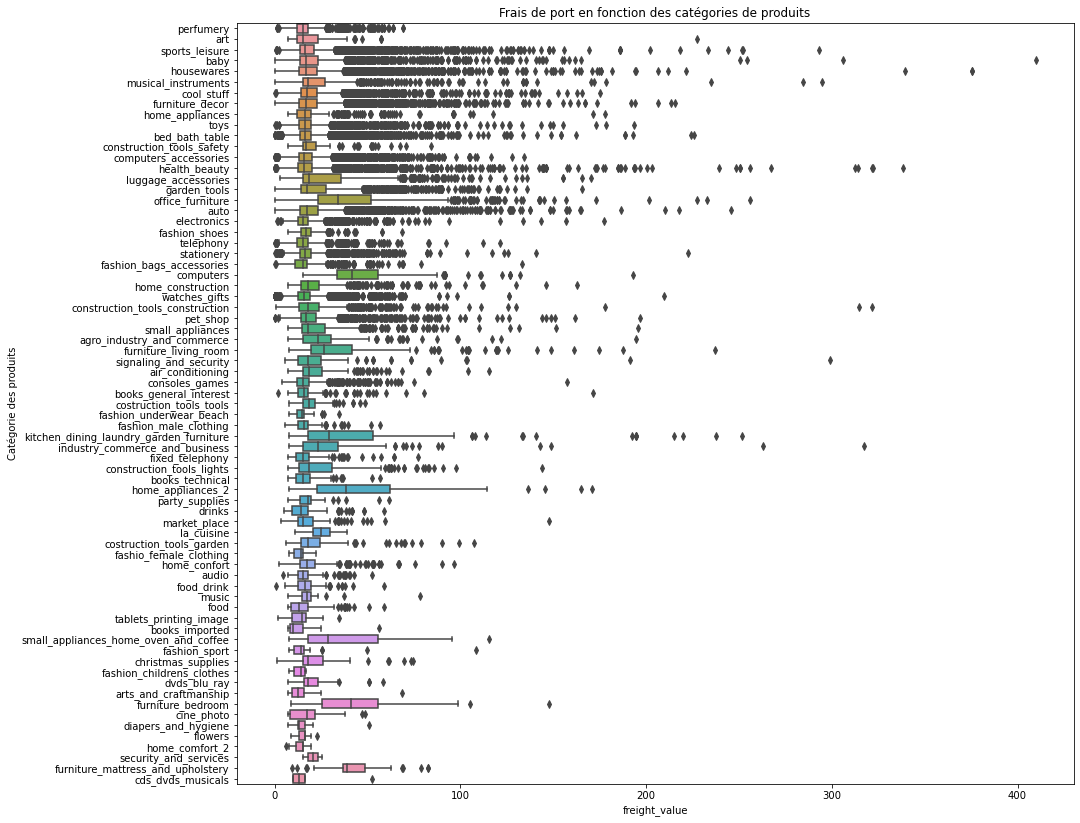

In [80]:
plt.figure(figsize=(15, 14))
sns.boxplot(x="freight_value", y="product_category_name_english",
            data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Frais de port en fonction des catégories de produits")
plt.show()


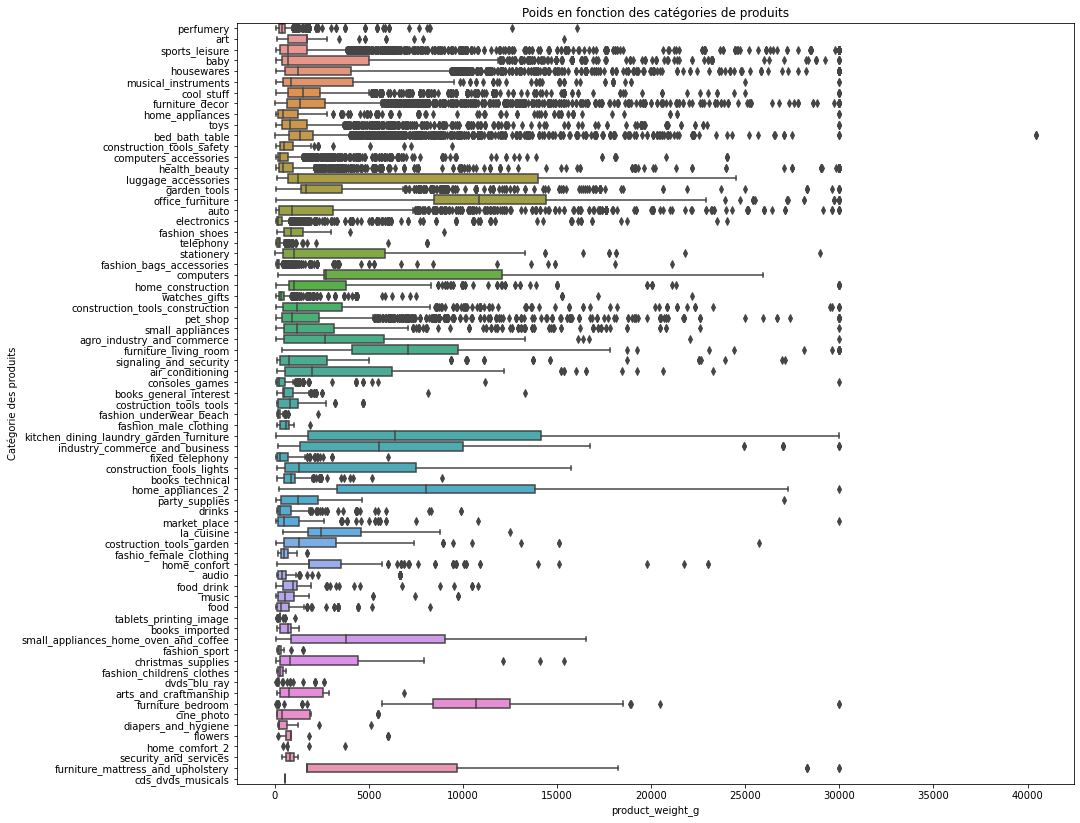

In [81]:
plt.figure(figsize=(15, 14))
sns.boxplot(x="product_weight_g", y="product_category_name_english",
            data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Poids en fonction des catégories de produits")
plt.show()

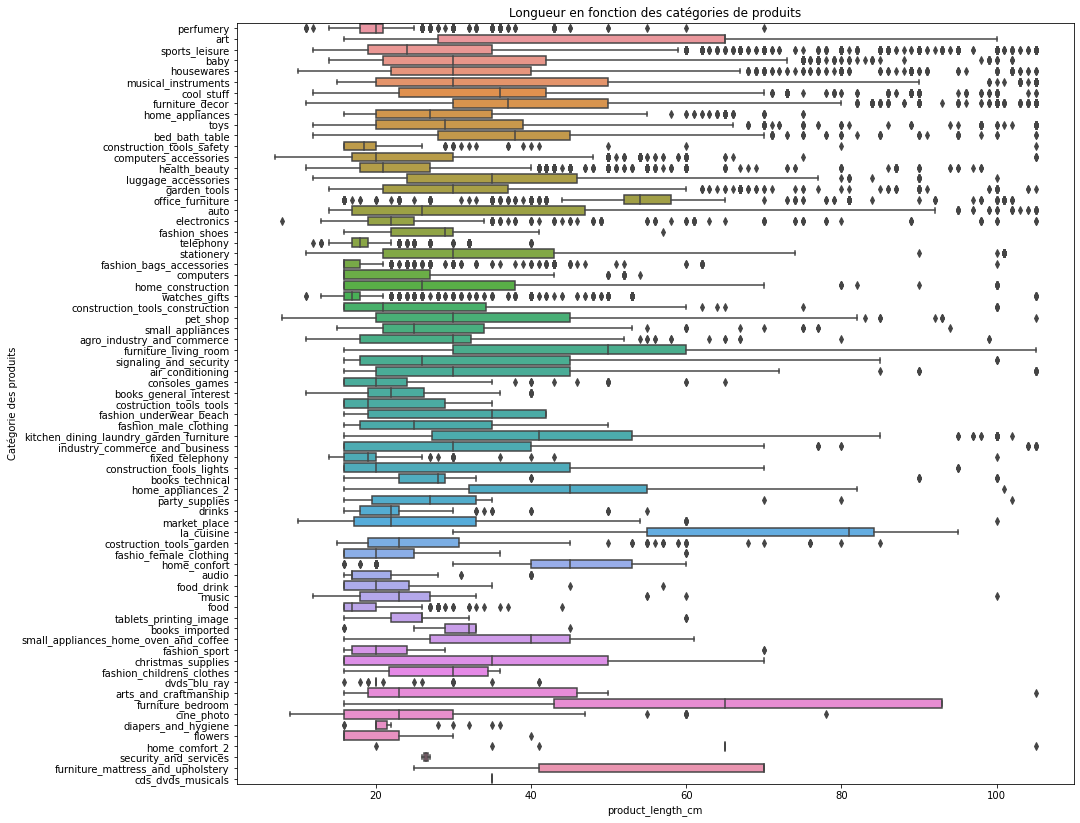

In [82]:
plt.figure(figsize=(15, 14))
sns.boxplot(x="product_length_cm", y="product_category_name_english",
            data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Longueur en fonction des catégories de produits")
plt.show()

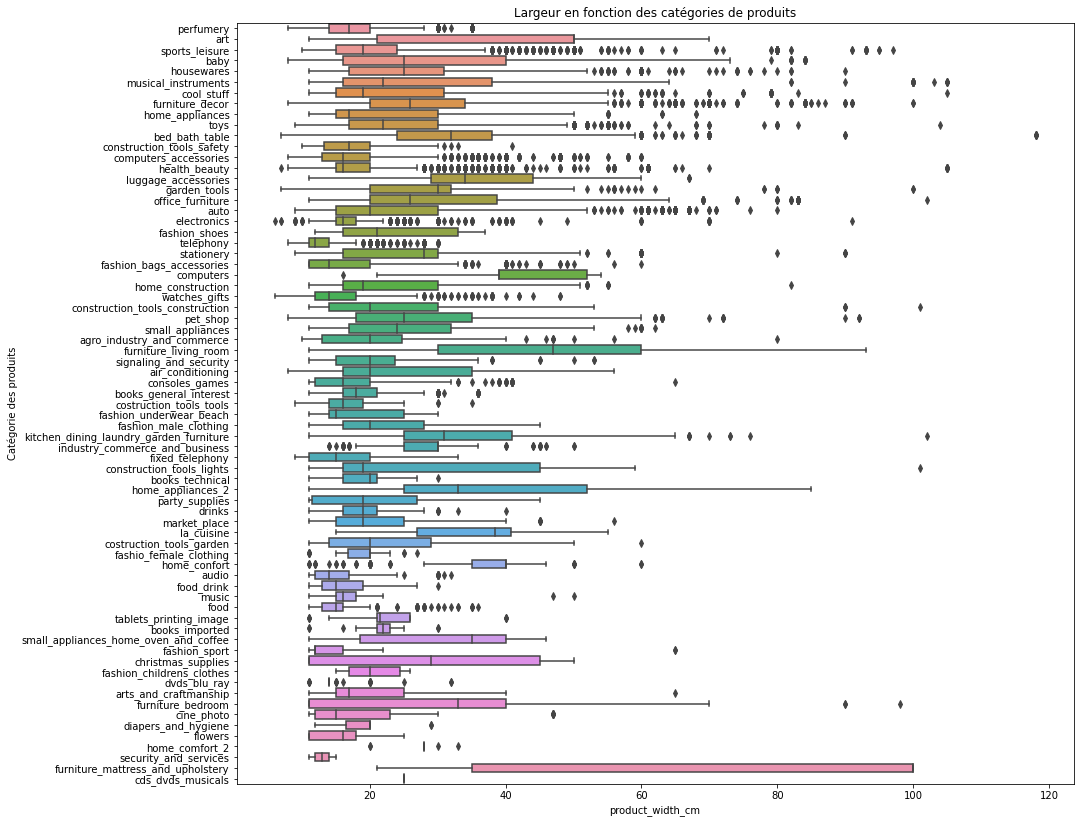

In [83]:
plt.figure(figsize=(15, 14))
sns.boxplot(x="product_width_cm", y="product_category_name_english",
            data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Largeur en fonction des catégories de produits")
plt.show()

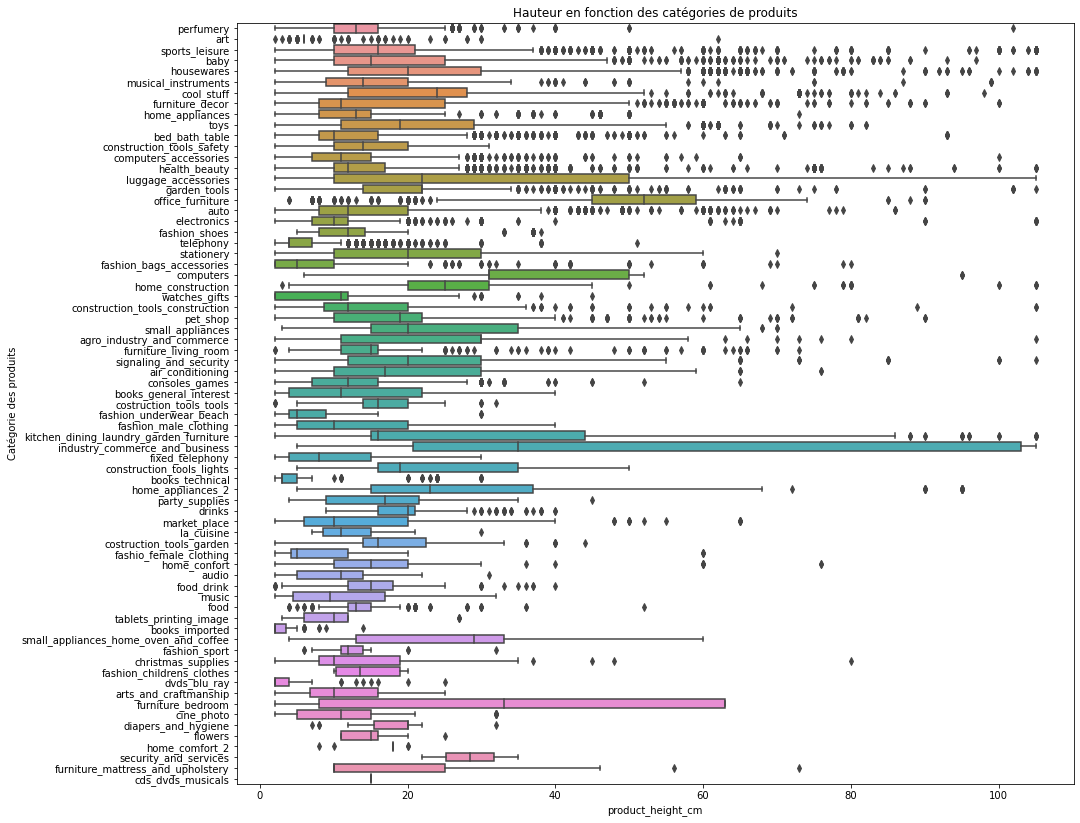

In [84]:
plt.figure(figsize=(15, 14))
sns.boxplot(x="product_height_cm", y="product_category_name_english",
            data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Hauteur en fonction des catégories de produits")
plt.show()

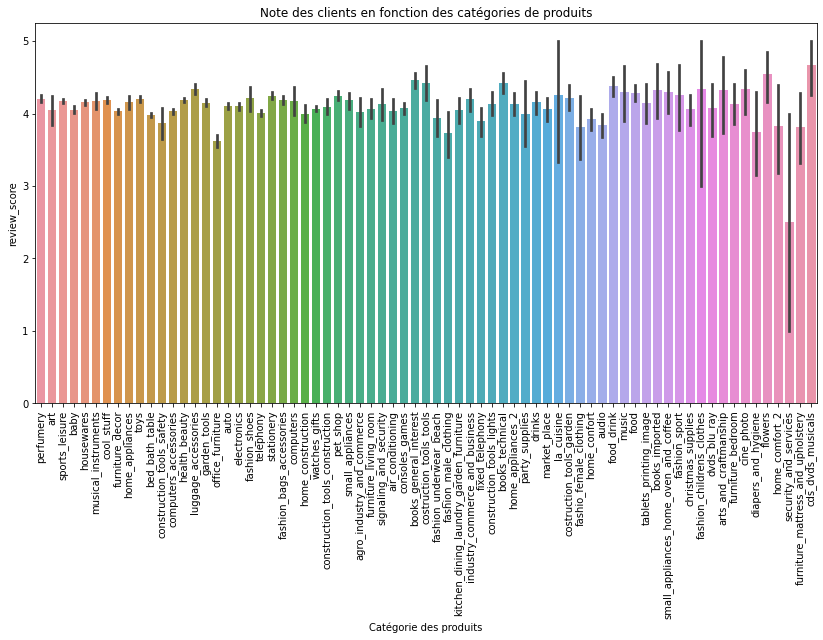

In [85]:
plt.figure(figsize=(14, 7))
sns.barplot(x="product_category_name_english", y="review_score",
            data=df_prod_orders)
plt.xlabel("Catégorie des produits")
plt.xticks(rotation=90)
plt.title("Note des clients en fonction des catégories de produits")
plt.show()

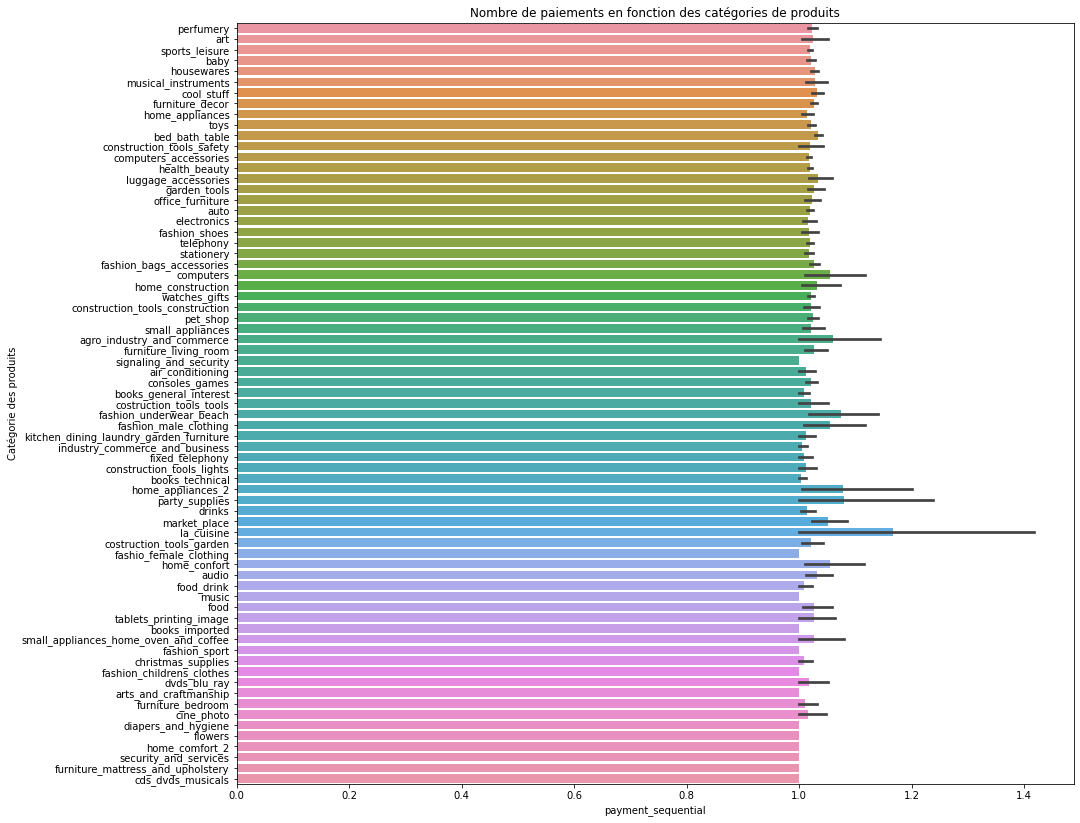

In [86]:
plt.figure(figsize=(15, 14))
sns.barplot(x="payment_sequential", y="product_category_name_english",
            data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Nombre de paiements en fonction des catégories de produits")
plt.show()